### Performing Data Analysis_ on Sales Data

In [124]:
## import the library
import pandas as pd
import os
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### Preparing datasets

In [105]:
files = [file for file in os.listdir('Sales_Data')]
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [106]:
### concatinating all datasets in to one dataframe
all_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv('Sales_Data/' + file)
    all_data = pd.concat([all_data , current_data])

all_data.shape

(186850, 6)

### Exploratory Data Analysis

In [94]:
### Exploring the dataframe
df = all_data
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [95]:
## Check the null values
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [96]:
### Drop the null values form the datasets
df = df.dropna(how = 'all') ## we can try different imputer
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [97]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


### Analyzing Monthly Sales

In [98]:
### define a lambda function that split the date and time
df['month'] = df['Order Date'].apply(lambda x: x.split('/')[0])

## checking the updated values
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [99]:
### check the unique value of the feature
df['month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [100]:
### filter invalid data_ if there is any
filt = df['month'] == 'Order Date'
df = df[~filt]  ## all apart from the imvalid
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [112]:
### deine a function that can convert string in to an integer
def to_int(col):
    return col.astype('int')

## apply the defined function
df[['month', 'Quantity Ordered']] = df[['month', 'Quantity Ordered']].apply(lambda x:to_int(x))

### check if the function in working in the dataset
df.dtypes 

Order ID            object
Product             object
Quantity Ordered     int32
Price Each          object
Order Date          object
Purchase Address    object
month                int32
dtype: object

In [117]:
### convert the price value in to a floating
df['Price Each'] = df['Price Each'].astype('float')

In [119]:
### calculat the sale 
## sale = quantity ordered * price 

## add the sale feature to the dataset
df['sales']  = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [177]:
### group by months : to check the overall sale in the month
mon_sale = df.groupby('month_name')['sales'].sum()
mon_sale

month_name
April        3390670.24
August       2244467.88
December     4613443.34
February     2202022.42
January      1822256.73
July         2647775.76
June         2577802.26
March        2807100.38
May          3152606.75
November     3199603.20
October      3736726.88
September    2097560.13
Name: sales, dtype: float64

In [176]:
### to add the month name in the x-axis

## make a dictionary of the months name and map the months 
months = pd.date_range('2022-01-01', periods=12, freq='MS')
num_list = [i for i in range(1, 13)]
month_names = months.strftime("%B")
mon_dict = {num: name for name, num in zip(month_names, num_list)}
df['month_name'] = df['month'].map(mon_dict)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,month_name
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,April
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,April
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,April
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,April
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,April


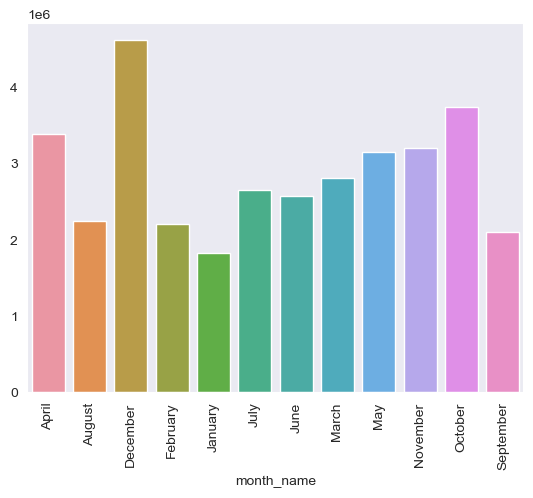

In [186]:
### Visualize sales in each months
sns.set_style('dark')
sns.barplot(x = mon_sale.index , y  = mon_sale.values)
plt.xticks(rotation = 90);

### Clean up the data

#### Task 1-  Drop rows of NaN

In [18]:
df['Order Date'].unique()

array(['04/19/19 08:46', nan, '04/07/19 22:30', ..., '09/23/19 07:39',
       '09/19/19 17:30', '09/30/19 00:18'], dtype=object)

In [20]:
df_nan = df[df.isnull().any(axis = 1)]
df = df.dropna(how = 'all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Find 'Or' and Delete it

In [21]:
df.iloc[519]

Order ID                                         177056
Product                                   Flatscreen TV
Quantity Ordered                                      1
Price Each                                          300
Order Date                               04/20/19 23:52
Purchase Address    180 9th St, San Francisco, CA 94016
Name: 521, dtype: object

In [23]:
temp_df = df['Order Date'].str[0:2] == 'Or'
temp_df

0         False
2         False
3         False
4         False
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Name: Order Date, Length: 186305, dtype: bool

In [11]:
# asses the data
temp_df = df[df['Order Date'].str[0:2] == 'Or']
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [24]:
df =  df[df['Order Date'].str[0:2] != 'Or']
df['Order Date'].isin(["Or"]).sum() ## double check

0

#### Argument data with additional columns

#### Task 2: Add Day/Months/year column

In [8]:
df[["Day", "Month", "Year"]] = df["Order Date"].str.split("/", expand = True) 
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day,Month,Year
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,19,19 08:46
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,07,19 22:30
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,12,19 14:38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,12,19 14:38


In [268]:
df['Month'] = df['Order Date'].str[0:2].astype(int)
df['Day'] = df['Order Date'].str[3:5]
df['Year'] = df['Order Date'].str[6:8]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,19,19
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,07,19
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,19
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,19
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,30,19


##### this uses when there is no time mixed with the date
date = pd.DatetimeIndex(df['Order Date'])

df['Year'], df['Month'], df['Day'] = date.year, date.month, date.day

### Question_1: What was the best month for sales? How much was earned that month? 

#### Add a sales column 

In [269]:
## converting to numeric si better than astype()
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,19,19,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,07,19,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,19,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,19,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,30,19,11.99


--Another way of converting to numeric--

df['Sales'] = df['Quantity Ordered'].astype(float) * df['Price Each'].astype(float)


In [53]:
## using ag function
df_g = df.groupby('Month')
df_g.agg({'Sales': "sum"})

In [270]:
## group by month and do the sum
df_grouped = df.groupby('Month').sum()
df_grouped.head()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75


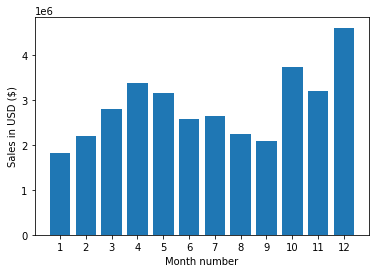

In [271]:
### plot to see the result
#df_grouped['Sales'].plot(kind = 'bar')
plt.bar(df_grouped.index, df_grouped['Sales'])
plt.xticks(df_grouped.index)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number');
plt.show();

>From here we can see that in the month of december.. there is a high volume of sale-- probably due to the holiday season! 

### Question 2 - What city had the highest number of sales? 

In [272]:
### Get the city from the address -- modified
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(" ")[1]  ## use the white space to removw the zipcode

df['Cities'] = df['Purchase Address'].apply(lambda x: get_city(x)) ## this apply the function per each row
df['States'] = df['Purchase Address'].apply(lambda x: get_state(x))

df['Cities'].head(100)

0              Dallas
2              Boston
3         Los Angeles
4         Los Angeles
5         Los Angeles
            ...      
96      San Francisco
97             Boston
98             Boston
99      New York City
100     San Francisco
Name: Cities, Length: 100, dtype: object

In [273]:
### group by the city column and finhd the sum of the sales
df_group_city = df.groupby('Cities').agg({'Sales': "sum"}) 
df_group_city.head()

,Sales
Cities,
Atlanta,2795498.58
Austin,1819581.75
Boston,3661642.01
Dallas,2767975.40
Los Angeles,5452570.80


In [ ]:
## Additinal code for making a better organization in the dateframe
#df['City']  = df['Order Date'].apply(lambda x: f'{egt_city(x)} ({get_state(x)})')

In [11]:
## Another way of splitting
##1 - df['Cities'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])
##2- df_2 = df['Purchase Address'].str.split(',', expand = True)
## df_city = df_2.iloc[:,1 ]
## df['City'] = df_city

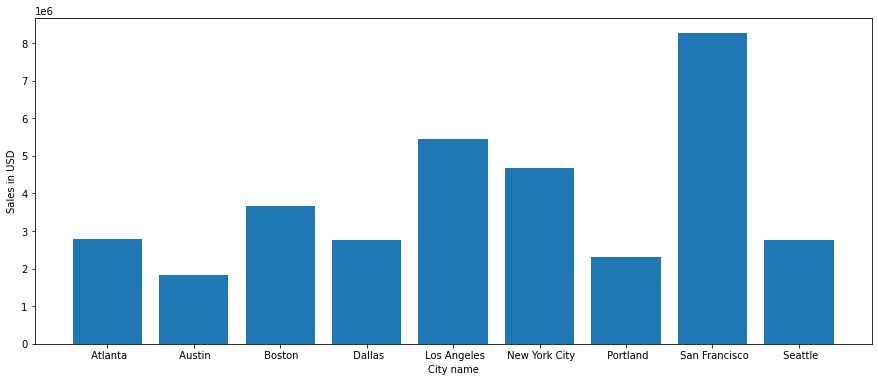

In [274]:
fig = plt.figure(figsize = (15,6))
#cities = df['Cities'].unique()
cities = [city for city, df in df.groupby('Cities')]
plt.bar(cities,df_group_city['Sales'])
#plt.xticks(cities , rotation = 'vertical', size = 10)
plt.ylabel('Sales in USD')
plt.xlabel('City name')
plt.show()

> From the result, we can see that San Francisco got the highest sale.. the reason could be as siliconvally need more electronics or there is more tech advertisements. People have more money in SF

#### Quesiton 3 - What time should we display advertisements to maximize likelihood of customer's buying products?

In [275]:
### best way to work with the time column
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df.groupby(['Hour']).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year,Sales,Cities,States,Minute
Hour,,,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


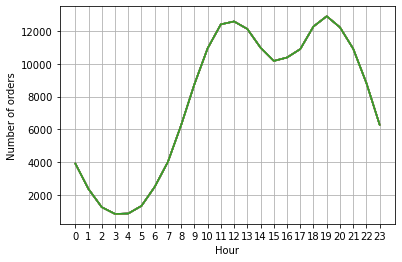

In [276]:
hours = [hour for hour, df in df.groupby('Hour')] ## give the list of hours
plt.plot(hours, df.groupby(['Hour']).count()) ## count helps to reduce the density
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.grid()
plt.show()

> From the result we can see that around the 12 pm (lunch break)  and 7 pm (more like after work deal) there is high sales. So it is ideal to make advertisements at that time

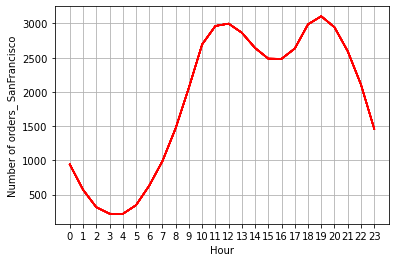

In [245]:
## San Francisco
df_drouped_SF = df[df['Cities'] == ' San Francisco']
df_drouped_SF.groupby('Hour').count()
## plotting

hours = [hour for hour, df in df.groupby('Hour')] ## give the list of hours
plt.plot(hours, df_drouped_SF.groupby('Hour').count(), color = 'Red') ## count helps to reduce the density
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of orders_ SanFrancisco')
plt.grid()
plt.show()

<AxesSubplot:xlabel='Time'>

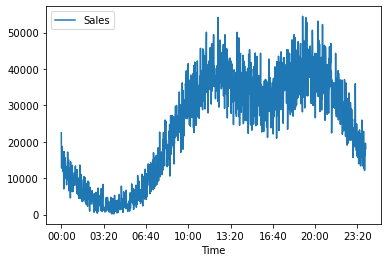

In [120]:
### another way-- gettting the time and plot --quick one
def get_time(order_date):
    return order_date.split(' ')[1]
df['Time'] = df['Order Date'].apply(lambda x: get_time(x))
group_time = df.groupby('Time').agg({'Sales': 'sum'})
group_time.plot()

### Question 4: What products are most often sold together?

In [277]:
## check the duplicates in the order
df_g = df[df['Order ID'].duplicated(keep = False)] ## keep helps to keep all the duplicates
df_g['Grouped'] = df_g.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


### remove the duplicates -- as there will be two rows for each grouping
df_g = df_g[['Order ID', 'Grouped']].drop_duplicates()
df_g.head()

C:\Users\SENAIT~1\AppData\Local\Temp/ipykernel_10884/2454213418.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_g['Grouped'] = df_g.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [278]:
from itertools import combinations
from collections import Counter ## this works with list

In [279]:
count = Counter()

In [280]:
for row in df_g['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) ## can make 3 items
#print(count)  ## a bit messy
##count.most_common(10)
for key, value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


>This idea can help make a smart deal.. like offering a promotions along side the first/ main item

### Question 5: What product sold the most? Why do you think it sold the most?

In [281]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Day', 'Year', 'Sales', 'Cities', 'States',
       'Hour', 'Minute'],
      dtype='object')

In [282]:
df['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

<Figure size 1080x360 with 0 Axes>

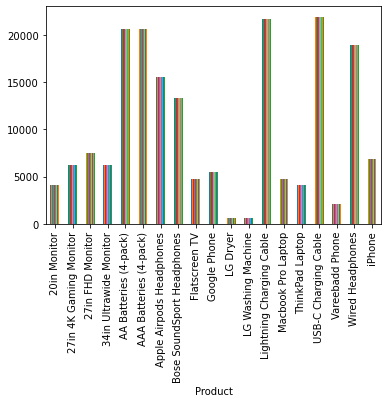

In [296]:
#products = [product for product, df in df.groupby('Product')]
fig = plt.figure(figsize = (15,5))
df_grouped_p = df.groupby('Product').count()
df_grouped_p.plot(kind = 'bar', legend = False)
plt.show()


> From the result we can see that USB-C Charging Cable and Lightning Charging Cable been sold the most..AA Batteries (4-pack) and 'AAA Batteries (4-pack) have als a good market value

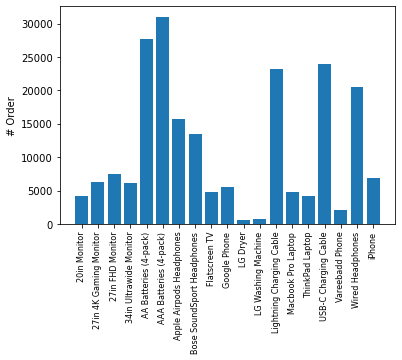

In [304]:
products = [product for product, df in df.groupby('Product')]
df_grouped_p_ordered = df.groupby('Product').sum()['Quantity Ordered']

plt.bar(products, df_grouped_p_ordered)
plt.xticks(products, rotation = 'vertical', size = 8 )
plt.ylabel('# Order');

C:\Users\SENAIT~1\AppData\Local\Temp/ipykernel_10884/721653663.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size = 8 )


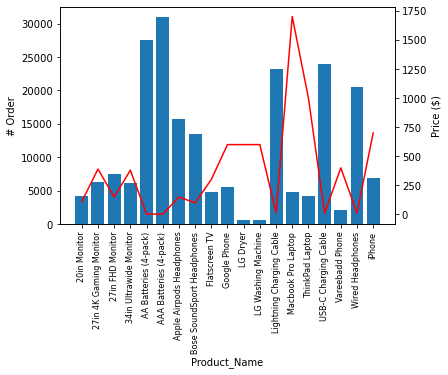

In [313]:
## to check the average price for the items/products
price = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, df_grouped_p_ordered)
ax2.plot(products , price, 'r-')

ax1.set_xlabel('Product_Name')
ax1.set_ylabel('# Order', color = 'black')
ax2.set_ylabel('Price ($)', color = 'black')

ax1.set_xticklabels(products, rotation = 'vertical', size = 8 )

plt.show()

<AxesSubplot:xlabel='Product'>

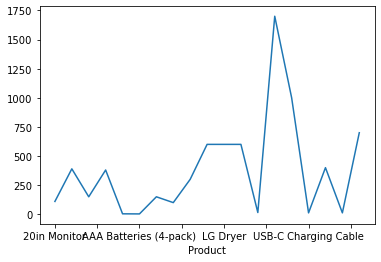

In [290]:
price.plot()
plt

In [ ]:
## this project is so awesome